# Modelos Gráficos Probabilísticos y Análisis Causal


## Redes Bayesianas

Al contrario de la Estadística tradicional, el aprendizaje bajo la Estadística Bayesiana tiene un enfoque probabilístico. Así, el razonamiento bayesiano supone que:
- Las hipótesis están gobernadas por una distribución de probabilidad
- Las decisiones son tomadas de forma “óptima” a partir de las observaciones y dichas probabilidades
En este proceso de aprendizaje, las instancias de entrenamiento pueden modificar la probabilidad de una hipótesis, de forma que su planteamiento es mucho menos restrictivo que las técnicas tradicionales (cumplimiento de hipótesis más deterministas). Por tanto, el conocimiento a priori es combinado con las observaciones de los datos con el fin de mejorar el eficiencia de las estimaciones.

Como veremos más adelante, los modelos bayesianos son muy utilizados en todo tipo de investigaciones debido a que proporcionan muy buenos resultados tanto para problemas descriptivos como predictivos: 
- Método descriptivo: permite descubrir las relaciones de dependencia/independencia entre las diferentes variables
- Método predictivo: son utilizadas como métodos de clasificación.
Entre las características de este tipo de técnicas se pueden citar:
- Permite realizar inferencias sobre los datos, lo que conlleva a inducir modelos probabilísticos
- Facilitar la interpretación de otros métodos en términos probabilísticos
- Se necesita conocer un elevado número de probabilidades
- Elevado coste computacional al realizar la actualización de las probabilidades

Antes de entrar en detalle en la estructura de los métodos bayesianos definir algunos conceptos:
- Arco: es un par ordenado (X, Y). En la representación gráfica, un arco (X,Y) viene dado por una flecha desde X hasta Y.
- Grafo dirigido: es un par G = (N, A) donde N es un conjunto de nodos y A un conjunto de arcos definidos sobre los nodos.
- Grafo no dirigido. Es un par G = (N,A) donde N es un conjunto de nodos y A un conjunto de arcos no orientados (es decir, pares noordenados (X,Y)) definidos sobre los nodos.
Ciclo: es un camino no dirigido que empieza y termina en el mismo nodo X.
- Grafo acíclico: es un grafo que no contiene ciclos.
- Padre. X es un padre de Y si y sólo si existe un arco X -> Y. Se dice también que Y es hijo de X. Al conjunto de los padres de X se representa como pa(X), y al de los hijos de X por S(X).
- Antepasado o ascendiente. X es un antepasado o ascendiente de Z si y sólo si existe un camino dirigido de X a Z.
- Descendiente. Z es un descendiente de X si y sólo si X es un antepasado de Z. Al conjunto de los descendientes de X lo denotaremos por de(X).
- Variable proposicional es una variable aleatoria que toma un conjunto exhaustivo y excluyente de valores. La denotaremos con letras mayúsculas, por ejemplo X, y a un valor cualquiera de la variable con la misma letra en minúscula, x.
- Dos variables X e Y son independientes si se tiene que P(X/Y) = P(X). De esta definición se tiene una caracterización de la independencia que se puede utilizar como definición alternativa: X e Y son independientes sí y sólo sí P(X,Y) = P(X)·P(Y).
- Dos variables X e Y son independientes dado una tercera variable Z si se tiene que P(X/Y,Z) = P(X/Y). De esta definición se tiene una caracterización de la independencia que se puede utilizar como definición alternativa: X e Y son independientes dado Z sí y sólo sí P(X,Y/Z) = P(X/Z)·P(Y/Z). También se dice que Z separa condicionalmente a X e Y.


### Modelo Naive Bayes: Hipótesis Map y Teorema de Bayes

La inferencia bayesiana es el eje central de los métodos bayesianos. Bajo ella, las hipótesis son expresadas a partir de distribuciones de probabilidad formuladas según los datos observados, $p(\theta)$, donde $\theta$ son magnitudes desconocidas. La función verosimilitud, $p(y/\theta)$, contiene la información disponible en los datos en relación a los parámetros y es ésta la que se usa para actualizar la distribución a priori, $p(\theta)$). Finalmente, para llevar a cabo dicha actualización se emplea el Teorema de Bayes.

Para entender el del **Teorema de Bayes** es necesario definir los siguientes conceptos:
- P(h) es la probabilidad a priori de la hipótesis h. Esta probabilidad contiene la información de que dicha hipótesis sea cierta
- P(D) es la probabilidad a priori de D. Esta es la probabilidad de observar los datos D (sin tener en cuenta la hipótesis que ha de ser cumplida)
- P(h/D) es la probabilidad a posteriori de D, es decir, es la probabilidad de que la hipótesis h una vez los datos D son observados. 
- P(D/h) es la probabilidad a posteriori de D, es decir, es la probabilidad de que los datos D sean observados una vez la hipótesis h sea correcta.

Sabiendo que la probabilidad conjunta de un evento dado el otro es proporcional a la probabilidad conjunta de ambos ponderada por la probabilidad del evento condicionante, se tiene:

$$
P(h \cap D) = P(h) \cdot P(D \mid h)
$$

$$
P(h \cap D) = P(D) \cdot P(h \mid D)
$$

Igualando ambas ecuaciones y manipulando los términos se llega el Teorema de Bayes:

$$
P(h \mid D) = \frac{P(h) \cdot P(D \mid h)}{P(D)}
$$

De forma que la probabilidad a posteriori se puede determinar a partir de la probabilidad a priori y un factor de corrección.

Para una mejora interpretación del Teorema de Bayes se muestra un ejemplo: 
>**En la sala de Pediatría de un determinado hospital el 60% de los pacientes son niñas. De los niños, se conoce que el 35% tienen menos de 24 meses, mientras que para las niñas el 20% son menores de 24 meses.
Un médico selecciona una criatura al azar. Si la criatura tiene menos de 24, ¿cuál es la probabilidad de que sea niña?
La tabla siguiente muestra la información que se deduce del enunciado:**

>La tabla siguiente muestra la información que se deduce del enunciado:

| Probabilidad          | Valor  |
|-----------------------|--------|
| P(niño)               | 0.40   |
| P(niña)               | 0.60   |
| P(<24m / niño)        | 0.35   |
| P(<24m / niña)        | 0.20   |

>Se obtiene la probabilidad total de que la criatura tenga menos de 24 meses

$$
P(<24m) = P(\text{niño}) \cdot P(<24m \mid \text{niño}) + P(\text{niña}) \cdot P(<24m \mid \text{niña}) = 0.4 \cdot 0.35 + 0.6 \cdot 0.2 = 0.26
$$

>Aplicando el teorema de Bayes:

$$
P(\text{niña} \mid <24m) = \frac{P(\text{niña}) \cdot P(<24m \mid \text{niña})}{P(<24m)} = \frac{0.6 \cdot 0.2}{0.26} = 0.46
$$


Por tanto, se tiene un 46% de posibilidades de que el médico haya seleccionado a una niña.

A partir de la *probabilidad a posteriori* obtenida mediante la aplicación del Teorema de Bayes, se está en disposición de maximizar tal expresión; es decir, obtener la hipótesis más probable conocida como **hipótesis MAP (o máximo a posteriori)**:

$$
h_{MAP} = \arg\max_h P(h \mid D) = \arg\max_h [P(h) \cdot P(D \mid h)]
$$

Donde se ha tenido en cuenta que *P(D)* toma el mismo valor en todas las hipótesis.

>**Supongamos que estamos tratando de predecir si un estudiante aprueba un examen basándonos en dos características: horas de estudio y nivel de preparación. Nuestras hipótesis son**:

>- $H_1$**: el estudiante aprueba el examen**

>- $H_2$**: el estudiante no aprueba el examen**

>**Tenemos los siguientes datos:**

>- $H_1 = 0.7$**: probabilidad de que el estudiante apruebe el examen**
>- $H_2 = 0.3$**: probabilidad de que el estudiante NO apruebe el examen**
>- $P(E\mid H_1) = 0.8$**: probabilidad de que el estudiante estudie suficiente si aprueba**
>- $P(E\mid H_2) = 0.8$**: probabilidad de que el estudiante estudie suficiente si NO aprueba**

>**Ahora supongamos que un estudiante estudia durante 4 horas y está muy bien preparado. Queremos calcular las probabilidades a posteriori de que el estudiante apruebe o no apruebe el examen, y determinar la hipótesis MAP.**

>1. Calculamos la probabilidad marginal de observar las evidencias $E$:

$$
P(E) = P(E \mid H_1) \times P(H_1) + P(E \mid H_2) \times P(H_2)
$$

$$
P(E) = (0.8 \times 0.7) + (0.3 \times 0.3) = 0.56 + 0.09 = 0.65
$$

>2. Calculamos la probabilidad a posteriori de que el estudiante apruebe el examen ($H_1$) dado que las evidencias $E$ se observan:

$$
P(H_1 \mid E) = \frac{P(E \mid H_1) \times P(H_1)}{P(E)}
$$

$$
P(H_1 \mid E) = \frac{0.8 \times 0.7}{0.65} = \frac{0.56}{0.65} \approx 0.861
$$

>3. Calculamos la probabilidad a posteriori de que el estudiante no apruebe el examen ($H_2$) dado que las evidencias $E$ se observan:

$$
P(H_2 \mid E) = \frac{P(E \mid H_2) \times P(H_2)}{P(E)}
$$

$$
P(H_2 \mid E) = \frac{0.3 \times 0.3}{0.65} = \frac{0.09}{0.65} \approx 0.138
$$

>Por tanto, la hipótesis más probable es que el estudiante apruebe el examen dado que ha estudiado durante 4 horas y está bien preparado.

>Nota: Dado que $P(E)$ es constante para ambas hipótesis, se podría haber comparado directamente $P(H_1 \mid E)$ y $P(H_2 \mid E)$ para determinar la hipótesis MAP. 

El uso de la *hipótesis MAP* puede ser aplicado para resolver problemas de clasificación. 

Como sabemos, en dichas investigaciones se tiene una variable independiente conocida como clase o target y un conjunto de variables predictoras o atributos. Así, el Teorema de Bayes se puede reescribir como:

$$
P(C \mid (A_1, A_2, \ldots, A_N)) = \frac{P(C) \cdot P((A_1, A_2, \ldots, A_N) \mid C)}{P(A_1, A_2, \ldots, A_N)}
$$

Donde *C* denota el target o clase y $A_i$ el conjunto de variables explicativas.

Haciendo máxima la probabilidad de *C* dado los atributos se tiene:

$$
c_{MAP} = \underset{c \in \Delta}{\arg\max} \ P(C \mid (A_1, A_2, \ldots, A_N)) = P(C) \cdot P((A_1, A_2, \ldots, A_N) \mid C)
$$
    
siendo $\Delta$ el conjunto de valores que puede tomar la variable objetivo (target del problema).

Como puede verse, el enfoque planteado es bastante sencillo pero también muy costoso desde el punto de vista computacional ya que es necesario conocer las distribuciones de probabilidad de las variables implicadas en la investigación.

### Modelo Naive-Bayes

El clasificador Naïve-Bayes es una versión simplificada del proceso de modelización anterior. Este método supone que todos los atributos son independientes conocido el valor de la variable clase de forma que la función de probabilidad conjunta queda como:

<div style="text-align:center;">
$P(C \mid (A_1, A_2, \ldots, A_N)) = P(C) \cdot \prod_{i=1}^{N} P(A_i \mid C)$
<div>
    
Como es de esperar, el supuesto que subyace este clasificador no es muy realista; si bien, alcanza muy buenos resultados por lo que su uso está muy extendido en la comunidad de científico de datos.
    
<img src="../apuntes/soporte_imagenes/naive_bayes.jpg" width="550" height="550">
    
Como en el caso anterior, se obtiene la hipótesis que maximiza la probabilidad del valor de la clase.  

<div style="text-align:center;">
$c_{MAP} = \underset{c \in \Delta}{\arg\max} \left( P(C) \cdot \prod_{i=1}^{N} P(A_i \mid C) \right)$
<div>
    
El clasificador Naïve-Bayes puede emplearse tanto con variables explicativas discretas como numéricas. 

Cuando las variables explicativas son discretas, la probabilidad condicional es obtenida a partir de la frecuencia de los datos muestrales; de forma que ésta se define como el número de casos favorables entre el número de casos posibles. Matemáticamente, se tiene:

<div style="text-align:center;">
$P(x_i \mid \text{pa}(x_i)) = \frac{n(x_i, \text{pa}(x_i))}{n(\text{pa}(x_i))}$
<div>
    
Donde $n(x_i, Pa(x_i ))$  denota el número de registros de la muestra en el que la variable $X_i$ toma el valor $x_i$ y $pa(x_i )$ los padres de $X_i$. Notar que el padre de cada variable explicativa es la variable independiente, la cual se ha denominado target o clase.

En el caso en que el tamaño de la muestra de trabajo sea pequeño, el uso de las frecuencias puede ocasionar estimaciones poco fiables por lo que se emplean estimadores basados en suavizados. Uno de los más empleados es el estimador de Laplace en el que la probabilidad viene expresada por el número de casos favorables + 1 dividida por el de casos totales más el número de alternativas.
    
<div style="text-align:center;">
$P(x_i \mid \text{Pa}(x_i)) = \frac{n(x_i, \text{pa}(x_i)) + 1}{n(\text{pa}(x_i)) + \alpha}$
<div>
    
Por su parte, si se dispone de variables numéricas el estimador Naïve-Bayes supone que dichas variables siguen una distribución normal donde la media y la desviación típica son estimadas  a partir de los datos de la muestra. Sin embargo, en la mayor parte de las ocasionales, las variables continuas no suelen seguir una distribución de probabilidad normal es posible que las estimaciones sean poco eficientes por lo que se recomienda transformar dichas variables en cualitativas (por ejemplo: empleando los intervalos que se obtienen al tomar los cuantiles de su distribución).

In [38]:
import os
import numpy as np
import pandas as pd

datos = pd.read_csv("../datos/credit_g.csv")

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [39]:
# Pasamos las variables a categóricas
datos['checking_status'] = datos['checking_status'].astype('category')
datos['credit_history'] = datos['credit_history'].astype('category')
datos['purpose'] = datos['purpose'].astype('category')
datos['savings_status'] = datos['savings_status'].astype('category')
datos['employment'] = datos['employment'].astype('category')
datos['personal_status'] = datos['personal_status'].astype('category')
datos['other_parties'] = datos['other_parties'].astype('category')
datos['property_magnitude'] = datos['property_magnitude'].astype('category')
datos['other_payment_plans'] = datos['other_payment_plans'].astype('category')
datos['housing'] = datos['housing'].astype('category')
datos['job'] = datos['job'].astype('category')
datos['property_magnitude'] = datos['property_magnitude'].astype('category')
datos['own_telephone'] = datos['own_telephone'].astype('category')
datos['foreign_worker'] = datos['foreign_worker'].astype('category')
datos['class'] = datos['class'].astype('category')

In [40]:
# La variable class es una variable reservada en diferentes módulos de Python -> reemplazar por por target
datos.rename(columns={'class': 'target'}, inplace=True)
datos['target']=np.where(datos['target']=='good', 0, 1) # cambio en la codificación por sencillez en el preprocesado

In [72]:
# Definición de la muestra de trabajo
datos_entrada = datos.drop('target', axis=1) # Datos de entrada
datos_entrada = pd.get_dummies(datos_entrada, drop_first=True, dtype=int) #conversión a variables dummy

target = datos["target"] # muestra del target

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

# Partición de la muestra

test_size = 0.3 # muestra para el test 
seed = 222 # semilla

X_train, X_test, y_train, y_test = train_test_split(
    datos_entrada, target, test_size=test_size, random_state=seed, stratify=target
)

# Estandarización de la muestra
esc = StandardScaler().fit(X_train) # valores media y std de los datos de train

# aplicación a los datos de train y test
X_train_esc = esc.transform(X_train)
X_test_esc = esc.transform(X_test)

# Validación cruczada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=seed)

#### Bernoulli Naive Bayes

In [74]:
from sklearn.naive_bayes import BernoulliNB 
bernoulli_nb=BernoulliNB(force_alpha=False)

grid=[{'alpha': list(np.arange(0.05, 1, 0.1)), 'binarize': [0.3, 0.1, 0.0]}]

In [75]:
# Definición del modelo con hiperparámetros
gs_bernoulli_nb = GridSearchCV(
    estimator=bernoulli_nb, param_grid=grid, scoring='accuracy', cv=cv, n_jobs=1, return_train_score=False
)
gs_bernoulli_nb = gs_bernoulli_nb.fit(X_train, y_train)

print(f'Naive-Bayes (Bernoulli) (parámetros): {gs_bernoulli_nb.best_params_}') # parámetros del modelo final

bernoulli_nb = gs_bernoulli_nb.best_estimator_ # modelo final

Naive-Bayes (Bernoulli) (parámetros): {'alpha': 0.35000000000000003, 'binarize': 0.3}


In [76]:
# Resultados importantes de estos algoritmos (acceso dentro del objeto del modelo)
print(bernoulli_nb.class_log_prior_)  # logaritmo de la probabilidad de cada clase
print(bernoulli_nb.class_log_prior_)  # logaritmo de la probabilidad de cada clase
bernoulli_nb.feature_log_prob_ # logaritmo de la probabilidad de la variable dada la clase (P(Xi|Y)

[-0.35667494 -1.2039728 ]


array([[-7.13521258e-04, -7.13521258e-04, -7.13521258e-04,
        -7.13521258e-04, -7.13521258e-04, -7.13521258e-04,
        -7.13521258e-04, -1.45656902e+00, -1.62784555e+00,
        -2.63053455e+00, -1.07574552e+00, -2.49824155e+00,
        -6.41517688e-01, -3.85884642e+00, -1.62784555e+00,
        -2.06306927e+00, -2.40372023e+00, -3.00330109e+00,
        -1.72590991e+00, -4.72565710e+00, -1.19625860e+00,
        -3.96045660e+00, -4.07357140e+00, -2.54907842e+00,
        -2.81654040e+00, -5.96115527e-01, -2.75061868e+00,
        -1.62784555e+00, -1.92823560e+00, -1.28796893e+00,
        -2.85120591e+00, -3.46471747e+00, -2.25716801e+00,
        -5.81428280e-01, -2.78303643e+00, -9.02587657e-02,
        -2.14666010e+00, -1.15015231e+00, -1.12472990e+00,
        -1.64306690e-01, -3.28620337e+00, -2.89517871e-01,
        -1.80944085e+00, -3.76661520e+00, -1.54808231e+00,
        -4.67845780e-01, -8.75998733e-01, -4.23558447e-02],
       [-1.66251077e-03, -1.66251077e-03, -1.66251077e-

Accuracy
------------------------------
Entrenamiento (cv): 0.745
Test: 0.70667


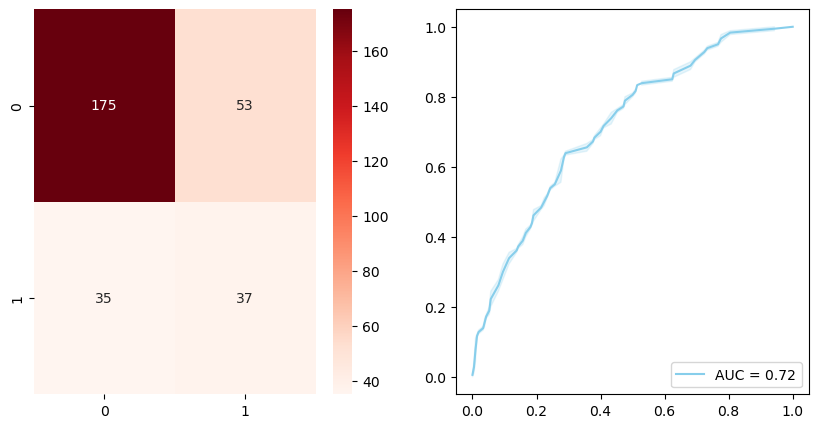

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

import warnings
# Suprimir todas las advertencias
warnings.simplefilter("ignore")


# Predicciones muestra entrenamiento y test

preds_train = bernoulli_nb.predict(X_train)
preds_test = bernoulli_nb.predict(X_test)

# Cálculo métricas bondad de ajuste 
print('Accuracy')
print('------------------------------')
print(f'Entrenamiento (cv): {round(gs_bernoulli_nb.best_score_,5)}')
accuracy_test = accuracy_score(y_test, preds_test)
print(f'Test: {round(accuracy_test,5)}')

# AUC - test y curva roc (final
y_pred_test = bernoulli_nb.predict_proba(X_test)
fp_rate_test, tp_rate_test, thresholds = roc_curve(y_test, y_pred_test[:,1])
auc_test = auc(fp_rate_test, tp_rate_test)

# Bondad de ajuste: matriz de confusión y curva roc para los datos de test

f, axes = plt.subplots(1, 2, figsize=(10,5))

sns.heatmap(confusion_matrix(preds_test, y_test), annot = True, cmap = plt.cm.Reds, fmt='.0f', ax=axes[0]) # matriz de confusión
sns.lineplot(x=fp_rate_test, y=tp_rate_test, color='skyblue', label='AUC = %0.2f' % auc_test, ax=axes[1]) # curva roc

plt.legend(loc="lower right")
plt.show()


#### Gaussian Naive Bayes

Naive-Bayes (Bernoulli) (parámetros): {'var_smoothing': 0.08}
Accuracy
------------------------------
Entrenamiento (cv):, 0.70571
Test: 0.70667


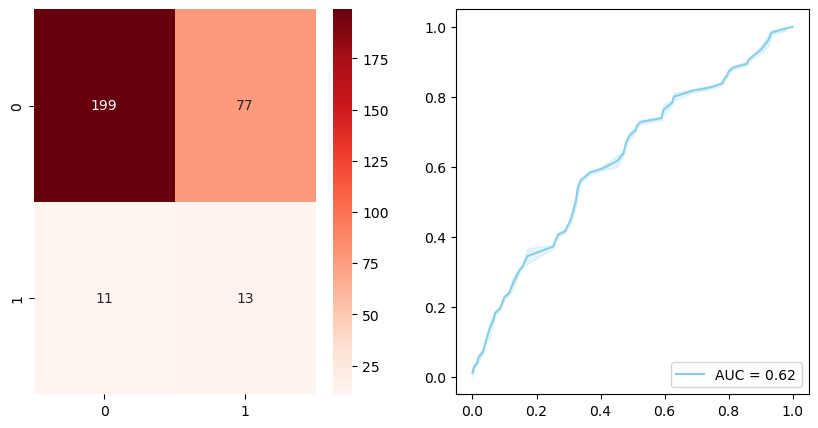

In [92]:
from sklearn.naive_bayes import GaussianNB  

gaussian_nb = GaussianNB()
grid=[{'var_smoothing': list(np.arange(0,0.1, 0.02))}]

# Definición del modelo con hiperparámetros
gs_gaussian_nb=GridSearchCV(
    estimator=gaussian_nb, param_grid=grid, scoring='accuracy', cv=cv, n_jobs=1, return_train_score=False
)

gs_gaussian_nb = gs_gaussian_nb.fit(X_train, y_train)
print('Naive-Bayes (Bernoulli) (parámetros):', gs_gaussian_nb.best_params_) 

#parámetros del modelo final
gaussian_nb = gs_gaussian_nb.best_estimator_ #modelo final

# predicciones muestra entrenamiento y test

preds_train = gaussian_nb.predict(X_train)
preds_test = gaussian_nb.predict(X_test)

# Cálculo métricas bondad de ajuste 

print('Accuracy')
print('------------------------------')
print(f'Entrenamiento (cv):, {round(gs_gaussian_nb.best_score_,5)}')
accuracy_test = accuracy_score(y_test, preds_test)
print('Test:', round(accuracy_test,5))

#AUC - test y curva roc (final)

y_pred_test = gaussian_nb.predict_proba(X_test)
fp_rate_test, tp_rate_test, thresholds = roc_curve(y_test, y_pred_test[:,1])
auc_test = auc(fp_rate_test, tp_rate_test)

# Bondad de ajuste: matriz de confusión y curva roc para los datos de test

f, axes = plt.subplots(1, 2, figsize=(10,5))

sns.heatmap(confusion_matrix(preds_test, y_test), annot = True, cmap = plt.cm.Reds, fmt='.0f', ax=axes[0]) # matriz de confusión
sns.lineplot(x=fp_rate_test, y=tp_rate_test, color='skyblue', label='AUC = %0.2f' % auc_test, ax=axes[1]) # curva roc

plt.legend(loc="lower right")
plt.show()


## Modelos Bayesianos

Las redes bayesianas son métodos estadísticos que representan la incertidumbre a través de las relaciones de independencia condicional que se establecen entre ellas. Por tanto, permiten modelar un fenómeno a partir de dichas relaciones y hacer inferencia.

Este tipo de métodos son una representación gráfica de dependencias para razonamiento probabilístico, en las que los nodos representan variables aleatorias y los arcos las relaciones de dependencia directa entre las variables.

<img src="../apuntes/soporte_imagenes/topologia_bayesiana.jpg" width="550" height="550">

La ventaja de las redes bayesianas frente a otros métodos es la posibilidad de codificar las dependencias/independencias relevantes considerando no sólo las dependencias marginales sino también las dependencias condicionales entre un conjunto de variables.

En definitiva, las redes bayesianas modelan las relaciones entre las variables tanto de forma cualitativa como cuantitativa. La fuerza de dichas relaciones viene dada en las distribuciones de probabilidad como una medida de la creencia que tenemos sobre esas relaciones en el modelo. 


### Formulación general

Una red bayesiana queda especificada formalmente por una dupla B=(G,Θ) donde G es un grafo dirigido acíclico (DAG, por las siglas en inglés) y Θ es el conjunto de distribuciones de probabilidad. Definimos un grafo como un par G = (V, E), donde V es un conjunto finito de vértices, nodos o variables, y E es un subconjunto del producto cartesiano VxV de pares ordenados de nodos que llamamos enlaces o aristas. Por tanto, puede decirse que las redes bayesianas representan el conocimiento cualitativo del modelo mediante el grafo dirigido acíclico.

>Supongamos una red bayesiana que contine un padre *A* y 3 hijos (*B*, *C* y *D*), siendo *C* también padre de *B*. El DAG que definido sería:

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


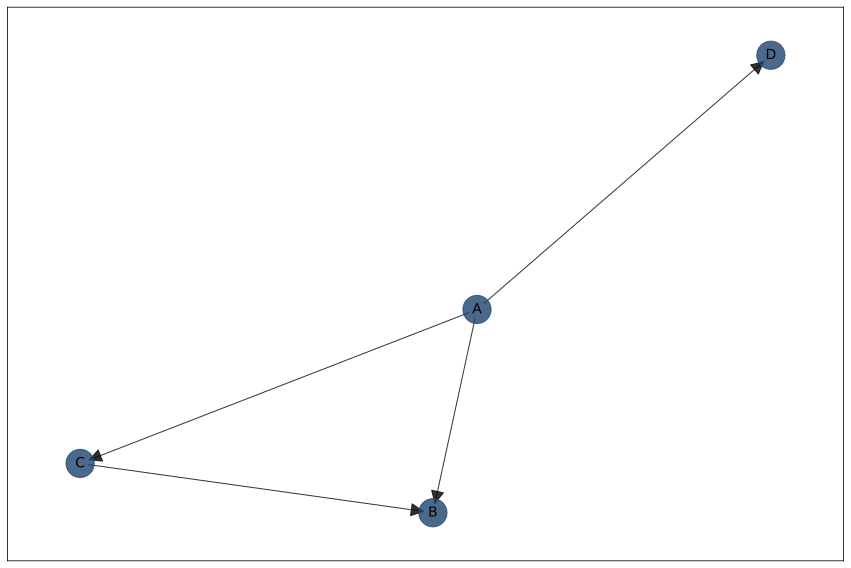

In [132]:
import bnlearn as bn
import matplotlib.pyplot as plt

edges = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('C', 'B')]
DAG = bn.make_DAG(edges, methodtype="bayes")

bn.plot(DAG, interactive=False)
plt.show()

# print(DAG["adjmat"])  # podemos ver el dag en formato tabla (no visual cuando existen muchos nodos)

El grafo define un modelo probabilístico mediante el producto de varias funciones de probabilidad condicionada:

<div style="text-align:center;">
$P(x_1, \ldots, x_n) = \prod_{i=1}^{N} P(x_i \mid \text{pa}(x_i))$
<div>

Con $pa(x_i)$ las variables inmediatamente predecesoras de la variable $X_i$. En este sentido, los valores de probabilidades $P(x_i⁄pa(x_i ))$ son “almacenados” en el nodo que precede a la variable $X_i$.

Es importante resaltar que de no existir la expresión anterior, la red debiese ser descrita a partir de la probabilidad conjunta, lo que obligaría a trabajar con un número de parámetros mucho más elevado (creciente de forma exponencial en el número de nodos).
    
### Independencia condicional e inferencia de la red

Como se ha comentado anteriormente, una variable X es condicionalmente independiente de otra variable Y dada una tercera Z si, el hecho de que se tenga conocimiento Z, hace que Y no tenga influencia en X. 

<div style="text-align:center;">
$P(X|Y,Z)=P(X|Z)$
<div>

Por tanto, la hipótesis de **independencia condicional** establece que cada nodo debe ser independiente de los otros nodos de la red (salvo sus descendientes) dados sus padres. Dicho de otro modo, si se conocen los padres de una variable, ésta se vuelve independiente del resto de sus predecesores.    
    
>Veamos un ejemplo para facilitar la comprensión de la independencia condicional.
    
<img src="../apuntes/soporte_imagenes/ejemplo_redes_bayesianas.png" width="550" height="550">
    
>Partiendo de la red bayesiana de la imagen anterior, la probabilidad conjunta se define como: 

$$
\begin{align*}
P(X_1, X_2, \ldots, X_9) &= P(X_1) \cdot P(X_2) \cdot P(X_3 \mid X_2, X_1) \cdot P(X_4 \mid X_3, X_2, X_1) \\
&\quad \cdot P(X_5 \mid X_4, X_3, X_2, X_1) \cdot P(X_6 \mid X_5, X_4, X_3, X_2, X_1) \\
&\quad \cdot P(X_7 \mid X_6, X_5, X_4, X_3, X_2, X_1) \\
&\quad \cdot P(X_8 \mid X_7, X_6, X_5, X_4, X_3, X_2, X_1) \\
&\quad \cdot P(X_9 \mid X_8, X_7, X_6, X_5, X_4, X_3, X_2, X_1)
\end{align*}
$$

>En cambio, como las probabilidades condicionales solo dependen de sus padres (teorema anterior), la probabilidad conjunta toma la siguiente forma:

$$
\begin{align*}
P(X_1, X_2, \ldots, X_9) &= P(X_1) \cdot P(X_2) \cdot P(X_3 \mid X_2) \cdot P(X_4 \mid X_2, X_1) \\
&\quad \cdot P(X_5 \mid X_4) \cdot P(X_6 \mid X_4) \cdot P(X_7 \mid X_4) \\
&\quad \cdot P(X_8 \mid X_3) \cdot P(X_9 \mid X_3)
\end{align*}
$$    
    
Por tanto, *la propiedad de independencia de las redes bayesianas hace que se reduzca en gran medida los cálculos**.

En una red bayesiana, se conoce como **inferencia probabilística** a la propagación del conocimiento a través de la misma una vez se tienen nuevos datos. Este proceso se lleva a cabo actualizando las probabilidades a posteriori en toda la estructura de la red mediante el Teorema de Bayes. 
    
Como es de imaginar, el proceso de inferencia es muy costoso computacionalmente de forma que, dependiendo de las necesidades, se emplean algoritmos exactos o aproximados:
- Exactos: cuando puede calcularse la inferencia de forma exacta. El coste computacional necesario para la actualización de las probabilidades es viable
- Aproximados: se usan técnicas de muestreo que permita calcular de forma aproximada la inferencia. Usado cuando no es viable obtener la propagación exacta en un tiempo razonable

### Aprendizaje de las redes bayesianas
    
Como se ha visto, para determinar una red bayesiana es necesario especificar su estructura gráfica y una función de probabilidad conjunta. Dicho proceso es bastante laborioso debido a que, en muchos casos, se desconoce ambas especificaciones. Para paliar esta circunstancia, se han desarrollado diferentes métodos de aprendizaje. Así, el proceso de aprendizaje de una red bayesiana puede dividirse en dos estapas:
    
- Estructural (o dimensión cualitativa): búsqueda en el espacio de posibles redes
- Paramétrico (o dimensión cuantitativa): aprende la distribución de probabilidad a partir de los datos, dada la red

El *aprendizaje paramétrico* consiste en hallar los parámetros asociados a la estructura de la red. Estos parámetros están constituidos por las probabilidades de los nodos raíz y las probabilidades condicionales de las demás variables dados sus padres. Las probabilidades previas se corresponden con las marginales de los nodos raíz y las condicionales se obtienen de las distribuciones de cada nodo con sus padres.

En el *aprendizaje estructural* es donde se establecen las relaciones de dependencia que existen entre las variables del conjunto de datos para obtener el mejor grafo que represente estas relaciones. Este problema se hace prácticamente intratable desde el punto de vista computacional cuando el número de variables es grande. Por ello, suelen emplearse algoritmos de búsqueda para aprender la estructura de la red.
    
A continuación, se presentan algunos algoritmos de búsqueda para establecer la estructura de una red bayesiana.
    
**Algoritmo K2**
    
El algoritmo K2 es considerado el predecesor de otros algoritmos de búsqueda más sofisticados. basado en búsqueda y optimización de una métrica bayesiana es considerado como el predecesor y fuente de inspiración para las generaciones posteriores. El proceso de búsqueda de este algoritmo está dividido en las siguientes etapas:
- Ordenación de los nodos (variables de entrada) de forma que los posibles padres de una variable aparezcan siempre antes de ella para evitar la generación de ciclos. Esta restricción provoca que el algoritmo busque los padres posibles entre las variables predecesoras (ventaja computacional)
- Partiendo de este orden establecido, se calcula la ganancia que se produce en la medida al introducir una variable como padre

Finalmente, el proceso se repite para cada nodo mientras el incremento de calidad supere un cierto umbral preestablecido. 
    
**Algoritmo B**
    
Este algoritmo elimina la dependencia de la ordenación previa de los nodos de forma que su coste de computación es superior al algoritmo K2. complejidad computacional es mayor. Como en el caso anterior, el proceso es iniciado con padres vacíos con padres vacíos y en cada etapa se añade aquel enlace que maximice el incremento de calidad eliminando aquellos que producen ciclos. El proceso es detenido cuando una vez la inclusión de un arco no represente ninguna ganancia.

**Algoritmo Hill Climbing**

El algoritmo Hill Climbing (HC) es un procedimiento de búsqueda que parte de una solución inicial y, a partir de ésta, mediante técnicas heurística se calcula el nuevo valor utilizando todas las soluciones vecinas a la solución actual, seleccionando el vecino que mejor solución presenta. Por tanto, este algoritmo finaliza cuando no existe ningún vecino que pueda mejorar la solución vecina. 

Una variante muy útil y muy empleada consiste en considerar todos los posibles movimientos a partir del estado actual y elegir el mejor de ellos como nuevo estado. A este método se le denomina ascensión por la máxima pendiente o búsqueda del gradiente. 
    


>Vamos a mostrar un ejemplo de **aprendizaje de la estructura** en python:

In [187]:
import pandas as pd

datos = pd.read_csv("../datos/bayesian_data.csv", sep=";", index_col="Unnamed: 0")
datos = datos.rename(columns={'class': 'target'})  # target con 4 categorías


# Modelo de estructura
structure_model = bn.structure_learning.fit(datos, methodtype='tan', root_node="doors", class_node="target") # uso de hill-climbing

# nota: en este caso no estamos definiendo un padre para obtener la estructura bayesian

[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/21.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [188]:
structure_model["adjmat"]

target,doors,lug_boot,safety,persons,buying,maint,target
source,,,,,,,
doors,False,True,False,False,False,False,False
lug_boot,False,False,True,False,False,False,False
safety,False,False,False,True,True,False,False
persons,False,False,False,False,False,False,False
buying,False,False,False,False,False,True,False
maint,False,False,False,False,False,False,False
target,True,True,True,True,True,True,False


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


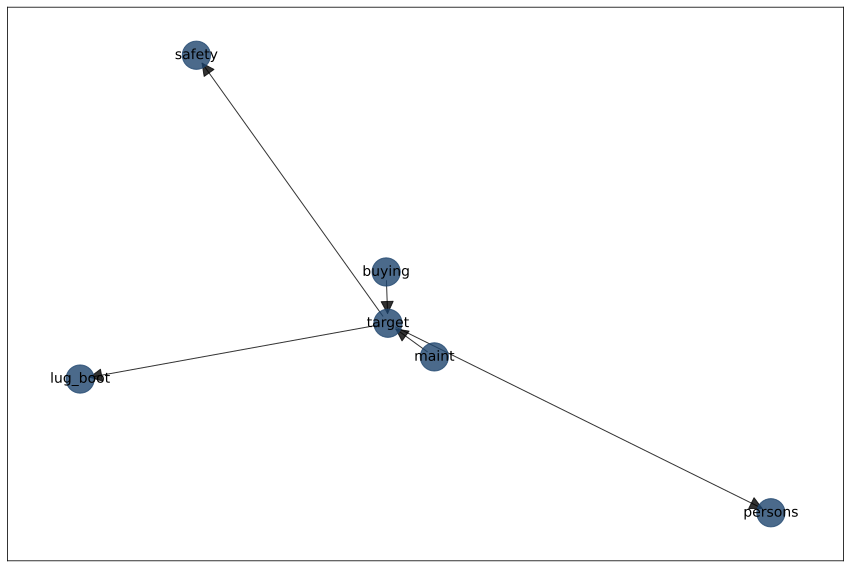

In [189]:
import matplotlib.pyplot as plt
bn.plot(model)
plt.show()

>Tanto del cuadro como del grafo, podemos ver que:

>- `target` es padre de: `safety`, `lug_boot` y `person`
>- `target` es hijo de: `buying` y `maint`

### Clasificadores

Como determinar la estructura de la red bayesiana es una tarea realmente compleja, la mayor parte de los modelos de clasificación basados en redes bayesianas suelen ser modificaciones del clasificador Naïve-Bayes. 

A día de hoy, existen muchos clasificadores de forma que se exponen brevemente tres de los más utilizados.

**Tan: Tree Augmented Naïve Bayes**

En el modelo TAN todos los atributos tienen como padre a otro atributo como mucho, además de la clase en sí, de forma que cada atributo obtiene un arco aumentado apuntando a él.

<img src="../apuntes/soporte_imagenes/modelo_tan.jpg" width="550" height="550">

**Ban: Naïve Bayes aumentado**

En este modelo se incorporan nuevos arcos entre todas las variables con la limitación de que no formen ciclos. Destacar la relevancia de este clasificador ya que su estructura es capaz de representar cualquier forma de red bayesiana.

<img src="../apuntes/soporte_imagenes/modelo_ban.jpg" width="550" height="550">

**AODE: Average One-Dependence Estimators**

Al igual que el algoritmo TAN, cada variable tiene como padre a la variable clase y como máximo a otro atributo. Sin embargo, la principal diferencia respecto al modelo anterior tiene lugar en la forma de obtener la predicción definitiva del modelo. Dicha predicción consiste en:
- El algoritmo establece posibles estructuras de red compatibles con el problema y, en función de ésta, hace una predicción de la clase
- La predicción final se obtiene como la media ponderada de las predicciones anteriores

<img src="../apuntes/soporte_imagenes/modelo_aode.png" width="550" height="550">

Una vez visto la parte teórica entramos en detalle a nivel práctico.

In [236]:
structure_tan_model = bn.structure_learning.fit(
    datos,
    methodtype='tan',
    root_node="doors", # hay que tener en cuenta algún hijo que no tenga más padre que el target
    class_node="target"  # en el modelo tan hay que tener una clase/padre)
) 
parameter_model = bn.parameter_learning.fit(structure_tan_model, datos, methodtype='bayes', verbose=0) 


[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/21.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [237]:
structure_tan_model["model_edges"] # bordes y nodos. También podría pintarse como en el caso anterior

[('doors', 'lug_boot'),
 ('lug_boot', 'safety'),
 ('safety', 'persons'),
 ('safety', 'buying'),
 ('buying', 'maint'),
 ('target', 'buying'),
 ('target', 'maint'),
 ('target', 'doors'),
 ('target', 'persons'),
 ('target', 'lug_boot'),
 ('target', 'safety')]

- Obención de las `probabilidades condicionadas`

In [242]:
# Probabilidades condicionadas

CPDs = bn.print_CPD(parameter_model, verbose=0)  # esto es un diccionario de dataframes (clave cada columna del df

    - Para doors:

In [243]:
CPDs["doors"][CPDs["doors"]["target"] == 0]

,doors,target,p
0,0,0,0.226341
4,1,0,0.254732
8,2,0,0.259464
12,3,0,0.259464


    - Para maint (y primera clase del target):

In [ ]:
CPDs["maint"][CPDs["maint"]["target"] == 0]

,maint,buying,target,p
0,0,0,0,0.302786
4,0,1,0,0.320957
8,0,2,0,0.290845
12,0,3,0,0.116171
16,1,0,0,0.302786
20,1,1,0,0.169142
24,1,2,0,0.144366
28,1,3,0,0.383829
32,2,0,0,0.302786
36,2,1,0,0.169142


Obtención de las `Predicciones sobre la muestra`

In [293]:
feats = list(datos.columns)
feats.remove("target")

# dado las evidencias de dos variables, calculamos la probabilidad de la clase
query = bn.inference.fit(parameter_model, variables=["target"], evidence={'doors':2, 'lug_boot': 'small'}, verbose=0)

query.df

,target,p
0,0,0.223607
1,1,0.118035
2,2,0.566716
3,3,0.091642


Por último, presentamos un ejemplo de uso de clasificador bayesiano empleando la librería **pyAgrum**. Esta librería es que es un contenedor de Python para la biblioteca aGrUM de C++. Proporciona una interfaz de alto nivel a la parte de aGrUM que permite crear, modelar, aprender, usar, calcular e integrar redes bayesianas y otros modelos gráficos probabilísticos como las redes de Markov o los modelos relacionales probabilísticos.

La librería se integra adecuadamente con *scikit-learn* por lo que se recomienda su uso para desarrollar clasificadores bayesianos.

In [ ]:
import os

import pandas as pd
import numpy as np

import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as gnb

datos = pd.read_csv("../datos/credit_g.csv")

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [21]:
# Pasamos las variables a categóricas
datos['checking_status'] = datos['checking_status'].astype('category')
datos['credit_history'] = datos['credit_history'].astype('category')
datos['purpose'] = datos['purpose'].astype('category')
datos['savings_status'] = datos['savings_status'].astype('category')
datos['employment'] = datos['employment'].astype('category')
datos['personal_status'] = datos['personal_status'].astype('category')
datos['other_parties'] = datos['other_parties'].astype('category')
datos['property_magnitude'] = datos['property_magnitude'].astype('category')
datos['other_payment_plans'] = datos['other_payment_plans'].astype('category')
datos['housing'] = datos['housing'].astype('category')
datos['job'] = datos['job'].astype('category')
datos['property_magnitude'] = datos['property_magnitude'].astype('category')
datos['own_telephone'] = datos['own_telephone'].astype('category')
datos['foreign_worker'] = datos['foreign_worker'].astype('category')
datos['class'] = datos['class'].astype('category')

# La variable class es una variable reservada en diferentes módulos de Python -> reemplazar por por target
datos.rename(columns={'class': 'target'}, inplace=True)
datos['target']=np.where(datos['target']=='good', 0, 1) # cambio en la codificación por sencillez en el preprocesado

# Definición de la muestra de trabajo
datos_entrada = datos.drop('target', axis=1) # Datos de entrada
datos_entrada = pd.get_dummies(datos_entrada, drop_first=True, dtype=int) #conversión a variables dummy

target = datos["target"] # muestra del target

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

# Partición de la muestra

test_size = 0.3 # muestra para el test 
seed = 222 # semilla

X_train, X_test, y_train, y_test = train_test_split(
    datos_entrada, target, test_size=test_size, random_state=seed, stratify=target
)

# Estandarización de la muestra
esc = StandardScaler().fit(X_train) # valores media y std de los datos de train

# aplicación a los datos de train y test
X_train_esc = esc.transform(X_train)
X_test_esc = esc.transform(X_test)

In [76]:
# Creación del clasificador TAN en python
bayesian_network = skbn.BNClassifier(
    learningMethod='TAN',
    prior='Smoothing',
    scoringType='BIC',
    priorWeight=0.5,
    discretizationStrategy='quantile',
    usePR=True,
    significant_digit = 6
)

bayesian_network.fit(X_train, y_train) # ajuste del modelo

In [77]:
from sklearn.metrics import accuracy_score

# predicciones para la muestra de train y test

train_probs = bn.predict_proba(X_train)  
test_probs = bn.predict_proba(X_test)

# predict-proba proporciona las probabilidades

def preds_ones(probs, threshold = 0.5):
    return np.where(probs[:, 0] > threshold, 0, 1)

y_train_pred = preds_ones(train_probs)
y_test_pred = preds_ones(tests_probs)

print(f'Accuracy (train) {round(accuracy_score(y_train, y_train_pred),2)}')
print(f'Accuracy (test) {round(accuracy_score(y_test, y_test_pred), 2)}')

Accuracy (train) 0.72
Accuracy (test) 0.73


## Modelos Ocultos de Markov

### Cadenas de Markov

Una cadena de Markov es un sistema matemático que experimenta transiciones de un estado a otro de acuerdo con un conjunto dado de reglas probabilísticas. La siguiente imagen presenta una representación gráfica de una cadena de Markov.

<img src="../apuntes/soporte_imagenes/cadena_markov.jpg" width="450" height="450">

Como puede verse, una cadena de Markov puede ser planteada como un gráfico dirigido en el que los nodos son los estados y los arcos contienen la probabilidad de pasar de un estado a otro. 

Las cadenas de Markov son procesos estocásticos pero se diferencian en que carecen de memoria. Así, en un proceso de Markov la probabilidad del siguiente estado del sistema depende solamente del estado actual del sistema y no de ningún estado anterior. 

<div style="text-align:center;">
$P(x_i│x_0 … x_{i-1})= P(x_i│x_{i-1})$
</div> 

La expresión anterior se conoce como **propiedad de Markov**.
	
Es importante destacar que una cadena de Markov puede ser vista como una red bayesiana en la que cada nodo tiene una tabla de probabilidad correspondiente a $P(x_t│x_{t-1})$ y es a misma para todos los nodos salvo para el instante inicial.

<img src="../apuntes/soporte_imagenes/cadena_markov2.jpg" width="850" height="850">

En toda cadena de Markov es necesario definir una matriz de transición, *T*, la cual contiene la información sobre la probabilidad de transición entre los diferentes estados del sistema. Como hecho relevante, cada fila de la matriz debe ser un vector de probabilidad y la suma de todos sus términos debe ser igual a la unidad.

Asimismo, las matrices de transición tienen la propiedad de que el producto de las matrices posteriores puede describir las probabilidades de transición a lo largo de un intervalo de tiempo. Esta característica permite modelar la probabilidad de estar en un determinado estado después de *n* pasos como:

<div style="text-align:center;">
$p^n= p^0* T^n$
</div>

Veamos un ejemplo con el que facilitar la comprensión del funcionamiento de una cadena de Markov.

>**Un grupo farmacéutico ha sacado al mercado tres pomadas hace pocas semanas. Con el fin de conocer su acogida así como el comportamiento futuro de los potenciales clientes ante las tres variantes del producto ha realizado un estudio de mercado. De dicho estudio se conocen las probabilidades de cambio de un tipo de pomada a otra.**

>La matriz de transición para *T* es:

><div style="text-align:center;">
\[
T = \begin{pmatrix}
0.80 & 0.10 & 0.10 \\
0.03 & 0.95 & 0.02 \\
0.20 & 0.05 & 0.75 \\
\end{pmatrix}
\]
<div>

>Sabiendo que actualmente, la participación en el mercado de las tres pomadas es:

><div style="text-align:center;">
\[
p = \begin{pmatrix}
0.30 \\
0.45 \\
0.25 \\
\end{pmatrix}
\]
<div>

>¿Cuáles serán las participaciones de mercado de cada marca en dos meses más?

>La matriz de transición para $T^2$ es:

><div style="text-align:center;">
\[
T^2 = \begin{pmatrix}
0.663 & 0.180 & 0.155 \\
0.057 & 0.907 & 0.037 \\
0.312 & 0.105 & 0.584 \\
\end{pmatrix}
\]
<div>

>De forma que usando la fórmula anterior, se tiene:

><div style="text-align:center;">
\[
p^2 = p^0 \cdot T^2 = \begin{pmatrix}
0.30 & 0.45 & 0.25
\end{pmatrix} \begin{pmatrix}
0.663 & 0.180 & 0.155 \\
0.057 & 0.907 & 0.037 \\
0.312 & 0.105 & 0.584 \\
\end{pmatrix} = \begin{pmatrix}
0.302 & 0.488 & 0.209
\end{pmatrix}
\]
<div>

>En vista de los resultados, la cuota de mercado de cada tipo de pomada variará en los dos meses siguientes en:
>- Pomada 1: de un 30% a 30,2% (estable)
>- Pomada 2: de un 45% a un 48,8% (leve aumento)
>- Pomada 3: de un 25% a un 20,9% (ligera caída)

### Cadena de Markov absorvente

Una **cadena de Markov absorbente** es una cadena de Markov en la que para algunos estados una vez ingresados, no es posible salir. Sin embargo, este es solo uno de los requisitos previos para que una cadena de Markov sea una cadena de Markov absorbente. Para que sea una cadena de Markov absorbente, todos los demás estados transitorios deben poder alcanzar el estado absorbente con una probabilidad de 1.

Con el fin de ayudar al entendimiento del comportamiento de una **cadena de Markov arbsorvente**, se plantea una simulación en python sobre la calidad creditia de *n* individuos y su comportamiento durante un año (12 pagos).

Suponiendo un modelo de impago bancario con los siguientes tres estados:
- Pago al día
- Pago con retraso
- Impago (estado absorbente)

Así, la matriz de transición para esta cadena de Markov es:

<div style="text-align:center;">
\[
T = \begin{pmatrix}
0.8 & 0.1 & 0.0 \\
0.2 & 0.4 & 0.4 \\
0.0 & 0.0 & 1.0 \\
\end{pmatrix}
\]
<div>

Esto significa que hay un 80% de probabilidad de que un individuo que paga al día continúe pagando al día, un 20% de probabilidad de que pase a un estado de pago con retraso, y un 0% de probabilidad de que entre en estado de impago (para pasar a impago debe pasar previamente por pago con retraso). Además, hay un 20% de probabilidad de que un individuo en estado de pago con retraso vuelva al estado de pago al día, un 40% de probabilidad de que permanezca en estado de pago con retraso y un 20% de probabilidad de que entre en estado de impago. Por último, el estado de impago es absorbente, lo que significa que una vez que un individuo entra en estado de impago, permanece allí indefinidamente.

In [71]:
import numpy as np

np.random.seed(123)

# Matriz de transición completa
transition_matrix = np.array([[0.8, 0.2, 0.0],  # De pago al día a pago con retraso o impago
                              [0.45, 0.4, 0.15],  # De pago con retraso a pago al día o impago
                              [0.0, 0.0, 1.0]]) # De impago a impago (estado de absorción)

# Muestra de individuos + número de pagos
n_samples = 10
n_pagos = 12

y = np.zeros(n_samples, dtype=int)  # Todos los individuos comienzan en estado de pago al día

muestra_dict = {} # Diccionario para recoger los pagos de cada muestra
for i in range(n_samples):
    # Generar transiciones de estado basadas en la matriz de transición completa
    current_state = 0  # Estado inicial: pago al día
    pagos_muestra_list = [] # Obtener secuencia en cada mes de pago
    for _ in range(n_pagos):  # Realizar los 12 pagos
        if current_state == 0:  # Si estamos en el estado de pago al día
            # solo nos quedamos con las posibles transiciones (no es posible ir al impago sin tener retraso en pago)
            next_state = np.random.choice([0, 1], p=transition_matrix[current_state][0:2])
        elif current_state == 1:  # Si estamos en el estado de pago con retraso
            # una vez estamos en retraso pago podemos volver a regular pagos (pago al día) o ir a impoago
            next_state = np.random.choice([0, 1, 2], p=transition_matrix[current_state])
        else:  # Si estamos en el estado de impago
            y[i] = 1  # estado absorbente
            break
        current_state = next_state
        pagos_muestra_list.append(current_state)
        muestra_dict[f"Individuo_{i}"] = pagos_muestra_list

En el diccionario `muestra_dict` se ha guardado el comportamiento de cada individuo a lo largo de los 12 pagos posteriores al punto inicial.

In [72]:
muestra_dict

{'Individuo_0': [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
 'Individuo_1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 'Individuo_2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Individuo_3': [0, 1, 2],
 'Individuo_4': [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
 'Individuo_5': [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 'Individuo_6': [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 'Individuo_7': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 'Individuo_8': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'Individuo_9': [0, 0, 0, 0, 0, 0, 0, 1, 1, 2]}

Como puede verse, la mayor parte de individuos no llegan al estado de impago y esto es consecuencia de las probabilidades existentes en la matriz de transición de partida.

La secuencia de pagos del *Individuo_5* hace que sea de interés focalizarse en él para detallar el impacto que tienen las cadenas de markov. Como puede verse, al inicio de pago se empieza a retrasar hasta volver a regularizar sus pagos a mediados del segundo trimestre. Tras esta regularización, meses después vuelve a caer de estado.

Las **cadenas de Markov** absorbentes tienen algunas propiedades específicas que las diferencian de las cadenas de Markov más simples. La más destacada es la referida a la forma en que la matriz de transición puede ser escrita. Sea una cadena con *t* estados transitorios y r estados absorbentes, la matriz de transición *T* puede escribirse en su forma canónica como:

<div style="text-align:center;">
\[
T = \begin{pmatrix}
Q & R \\
0 & I_t \\
\end{pmatrix}
\]
<div>

Donde *Q* es una matriz de *txt*, *R* es una matriz de *txr*, *0* es una matriz de ceros de *rxt* e *It* es la matriz identidad de *txt*.

En particular, la descomposición de la matriz de transición en la matriz fundamental permite ciertos cálculos, como el *número esperado de pasos hasta la absorción de cada estado*. La matriz fundamental *N* se calcula de la siguiente manera:

<div style="text-align:center;">
\[
N= (I_t-Q)^{-1}
\]
<div>

Siendo *I_t* es la matriz identidad de *txt*. Así, para obtener el *número esperado de pasos* se calcula como:

<div style="text-align:center;">
\[
n= N*1
\]
<div>

Donde 1 denota un vector columna de valor uno y longitud igual al número estados transitorios.

Por último, la probabilidad de que un estado transitorio sea absorbido es calculada como:

<div style="text-align:center;">
\[
p_{trans \rightarrow abs}= N * R
\]
<div>

Veamos un ejemplo de Cadena de Markov absorbente con el que podamos ver en detalle estos cálculos matriciales:

>**Imaginemos un cliente en un casino. Por cada apuesta gana 1€ con probabilidad de 0.3 o pierde 1€ con probabilidad de 0.7. Sabiendo que la apuesta ha sido iniciada con 2 € y que el cliente se retirará se retirará si pierde todo el dinero o bien lo duplica. Se pide:**
> - **Cuestión 1: Escribir la matriz de transición de una cadena de Markov**
> - **Cuestión 2: Determinar el promedio de apuestas hasta que el juego termina**
> - **Cuestión 3: Determinar la probabilidad de terminar el juego con 4€ o de marcharse de vacío**

> Cuestión 1:
> Del enunciado se conoce que se tienen 5 posibles estados (0, 1, 2, 3, 4) siendo los estados 0 y 4 absorbentes (pierde todo o duplica la apuesta, respectivamente). Teniendo en cuenta los posibles movimientos y las probabilidades asociadas se tiene:
> <div style="text-align:center;">
\[
T = \begin{pmatrix}
t_{00} & t_{01} & t_{02} & t_{03} & t_{04} \\
t_{10} & t_{11} & t_{12} & t_{13} & t_{14} \\
t_{20} & t_{21} & t_{22} & t_{23} & t_{24} \\
t_{30} & t_{31} & t_{32} & t_{33} & t_{34} \\
t_{40} & t_{41} & t_{42} & t_{43} & t_{44} \\
\end{pmatrix} = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 \\
0.7 & 0 & 0.3 & 0 & 0 \\
0 & 0.7 & 0 & 0.3 & 0 \\
0 & 0 & 0.7 & 0 & 0.3 \\
0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
\] 
<div>

> Cuestión 2:
> Se escribe la matriz T en su forma canónica. Notar que para ello es necesario reorganizar los estados (ahora, los estados absorbentes están en las últimas filas de la matriz T).
> <div style="text-align:center;">
\[
T =
\begin{pmatrix}
Q & R \\
0 & I_t \\
\end{pmatrix}
= \begin{pmatrix}
t_{11} & t_{12} & t_{13} & t_{10} & t_{14} \\
t_{21} & t_{22} & t_{23} & t_{20} & t_{24} \\
t_{31} & t_{32} & t_{33} & t_{30} & t_{34} \\
t_{01} & t_{02} & t_{03} & t_{00} & t_{04} \\
t_{41} & t_{42} & t_{43} & t_{40} & t_{44} \\
\end{pmatrix} = \begin{pmatrix}
0 & 0.3 & 0 & 0.7 & 0 \\
0.7 & 0 & 0.3 & 0 & 0 \\
0 & 0.7 & 0 & 0 & 0.3 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
\] 
<div>

> De forma que Q y R son:
> <div style="text-align:center;">
\[ Q = \begin{pmatrix} 0.0 & 0.3 & 0.0 \\ 0.7 & 0.0 & 0.3 \\ 0.0 & 0.7 & 0.0 \end{pmatrix}  \] 
\[ R = \begin{pmatrix} 0.7 & 0.0 \\ 0.0 & 0.0 \\ 0.0 & 0.3 \end{pmatrix} \] 
<div>

> El número de apuestas hasta terminar el juego es:

><div style="text-align:center;">
\[
N= (I_t-Q)^{-1} * 1 = {\begin{pmatrix} 0.0 & 0.3 & 0.0 \\ 0.7 & 0.0 & 0.3 \\ 0.0 & 0.7 & 0.0 \end{pmatrix}}^{-1} *
\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} = 
\begin{pmatrix} 1.362 & 0.517 & 0.155 \\ 1.207 & 1.724 & 0.517 \\ 0.845 &  1.207 & 1.362 \end{pmatrix} *
\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 2.034 \\ 3.448 \\ 3.414 \end{pmatrix} 
\]
<div>

> Teniendo en cuenta que el cliente empezó su apuesta con 2€, el número de apuestas esperadas hasta que el juego acabe son 3.448€.

> Cuestión 3:
> En este caso, se sabe que la probabilidad de llegar a un estado absorbente desde uno transitorio sigue la siguiente expresión:
><div style="text-align:center;">
\[
p_{trans \rightarrow abs}= N * R = (I_t-Q)^{-1} * R = 
\begin{pmatrix} 1.362 & 0.517 & 0.155 \\ 1.207 & 1.724 & 0.517 \\ 0.845 &  1.207 & 1.362 \end{pmatrix} *
\begin{pmatrix} 0.7 & 0\\ 0 & 0 \\ 0 & 0.3 \end{pmatrix} = \begin{pmatrix} 0.953 & 0.046 \\ 0.845 & 0.155\\ 0.591 & 0.409 \end{pmatrix} 
\]
<div> 

> Así, la probabilidad de que el cliente acabe con 4€ es de 15.5%. Por su parte, se tiene un 84.5% de posibilidades de que se vaya de vacío.

### Modelos Ocultos de Markov

Los **Modelos Ocultos de Markov**, HMMs (por sus siglas en inglés) son una extensión de las cadenas de Markov y sirven para tratar tanto eventos observables (presentes en la cadena de entrada) como eventos ocultos que consideramos causales del modelo probabilístico. Los Modelos Ocultos de Markov son utilizados cuando se conocen las evidencias sobre un sistema pero no los estados tienen lugar de forma que buscan establecer la relación existente entre los estados visibles y los ocultos. Algunos ejemplos de uso de este tipo de modelos:
- Separación de secuencias de nucleótidos por sus características biológicas (exón-intrón)
- Relacionar proteínas con sus funcionalidades
- Localización de genes en las células eucariotas
- Reconocimiento del habla
- Etiquetado de texto y traducción automática

En un HMM, para cada instante de tiempo o posición t en una secuencia se tiene:
- Una variable aleatoria $X_t$, con posibles estados $s_1, … ,s_n$ (no observables directamente)
- Otra variable aleatoria $E_t$, con posibles estados $v_1, … ,v_m$ (observaciones)
  
Para un buen funcionamiento de este tipo de modelos se asume dos propiedades:
- Propiedad de Markov: en cada posición, el estado solo depende del estado en la posición inmediatamente anterior: $P(X_t│Y, X_{t-1}) = P(X_t│X_{t-1})$
- Indpendencia de las observaciones: en cada posición, la observación solo depende del estado en esa posición: $P(E_t│Y, X_t )=P(E_t│X_t)$

De forma análoga a las cadenas de Markov, un HMM también puede ser expresado según una red bayesiana:

<img src="../apuntes/soporte_imagenes/hhm.jpg" width="850" height="850">

Así, cada nodo $X_t$ la misma tabla de probabilidad correspondiente a $P(X_t│X_{t-1})$ salvo en el instante anterior. Por el contrario, cada nodo $E_t$ tiene una única tabla de probabilidad correspondiente a $P(E_t│X_t)$.

Además de los estados ocultos y observables comentados anteriormente, un Modelo Oculto de Markov consta también de otros elementos que son citados a continuación:
- Respecto a los estados ocultos:
    - La matriz de probabilidades entre los estados, *A*, denominada matriz de transición. Así,  $a_{ij}=P(X_t=s_j│X_{t-1}=s_i)$ es la probabilidad de pasar del estado si al estado $s_j$
Es importante destacar que el modelo probabilístico que describe la manera de transitar entre una posición y la siguiente no cambia a lo largo de la secuencia. 
	- El vector de probabilidades a priori de cada estado, $\pi$, con $\pi_i=P(x_1=s_i)$
- Respecto a las observaciones:
	- La matriz de probabilidades de los observables, *B*, conocida como matriz de observación. Así,  $b_{ij}=P(E_t=v_j│X_t=s_i)$ es la probabilidad de observar $v_j$ cuando el estado es $s_i$

Es importante destacar que el modelo probabilístico que describe la emisión de la observación en cada estado no cambia a lo largo de la secuencia. 

Por tanto, un HMM está formado por la combinación de dos tipos de modelos: 
- El transicional el cual responde a los estados ocultos
- El modelo de evidencias que tiene en cuenta la información disponible de las observaciones

Un ejemplo básico sobre el uso de *Modelos Ocultos de Markov* en **bioinformática** se plantea a continuación.
En este ejemplo, se parte de una secuencia de ADN ficticia (observaciones) y se hace uso de un HHM para predecir la probabilidad de los estados ocultos ("codificación de genes" y "regiones no codificantes") en la secuencia de ADN.

In [103]:
import numpy as np
from hmmlearn import hmm

np.random.seed(444)

dna_sequence = "TCGAATCGAAGTATCGGCATTGGCTCGAGCGATCGATGCTAGCA"
states = ["Gene", "Non-Gene"]

# Conversión de la secuencia de ADN a números para que el modelo HMM pueda procesarla
# Por ejemplo, A=0, C=1, G=2, T=3
dna_encoded = np.array([[0 if base == "A" else 1 if base == "C" else 2 if base == "G" else 3 for base in dna_sequence]]).T

In [104]:
# Definir y entrenar el modelo
model = hmm.CategoricalHMM(n_components=2, n_iter=100) # las componentes son los estados
model.fit(dna_encoded) 

CategoricalHMM(n_components=2, n_features=4, n_iter=100,
               random_state=RandomState(MT19937) at 0x20DAD832A40)

In [106]:
model.predict_proba(dna_encoded)[0:20] # probabilidades de decodificación

array([[1.00000000e+00, 4.76513845e-29],
       [2.50255342e-17, 1.00000000e+00],
       [6.52747688e-05, 9.99934725e-01],
       [1.10395487e-06, 9.99998896e-01],
       [2.81778665e-07, 9.99999718e-01],
       [7.44771720e-01, 2.55228280e-01],
       [2.20178515e-09, 9.99999998e-01],
       [6.52747687e-05, 9.99934725e-01],
       [1.10395396e-06, 9.99998896e-01],
       [1.10400763e-06, 9.99998896e-01],
       [1.66607668e-05, 9.99983339e-01],
       [7.44759469e-01, 2.55240531e-01],
       [7.19214161e-08, 9.99999928e-01],
       [7.44771876e-01, 2.55228124e-01],
       [2.20178381e-09, 9.99999998e-01],
       [6.52705802e-05, 9.99934729e-01],
       [6.52705798e-05, 9.99934729e-01],
       [8.62672328e-09, 9.99999991e-01],
       [6.32750230e-07, 9.99999367e-01],
       [4.26870814e-01, 5.73129186e-01]])

In [107]:
# Decodificar los estados ocultos (genes vs no genes) utilizando el modelo entrenado
decoded_states = model.predict(dna_encoded) # predict asume un threshold de 0.5

# Decodificar los estados ocultos a sus etiquetas originales
decoded_states_labels = [states[state] for state in decoded_states]

print(f"Secuencia de ADN: {dna_sequence}")
print(f"Estados ocultos predichos: {decoded_states_labels}")

Secuencia de ADN: TCGAATCGAAGTATCGGCATTGGCTCGAGCGATCGATGCTAGCA
Estados ocultos predichos: ['Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Gene', 'Non-Gene', 'Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Gene', 'Non-Gene', 'Non-Gene', 'Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene', 'Non-Gene']


Dado una secuencia de observaciones $o_1 o_2 … o_t$, mediante un **Modelo Oculto de Markov** se pueden responder a distintos tipos de problemas como:
- Filtrado: permite conocer la probabilidad de que $X_t=q$
- Explicación más verosímil: también conocida como decodificación, permite conocer la secuencia de estados más probable.

A continuación, se presenta un ejemplo para explicar en detalle el proceso de obtención del **filtrado y de la explicación más verosímil en un Modelo Oculto de Markov**. 

**Suponga un trabajador en una plataforma de petróleo que no tiene contacto con el exterior en todo un año. Debido a su profesión, desconoce la situación meteorológica de cada día (si llueve o no), pero todas las mañanas siempre ve llegar al gerente a su oficina. El gerente unos días viene con paraguas y otros no. Imagine entonces que un sistema formado por dos estados ocultos (lluvia, no lluvia) y dos observaciones (paraguas, no paraguas) es utilizado para  pronosticar el tiempo por el trabajador. La siguiente imagen muestra la estructura de un Modelo Oculto de Markov en formato de red.**

<img src="../apuntes/soporte_imagenes/hhm_ejemplo.jpg" width="700" height="700">

El ejemplo es detallado tanto siguiendo los cálculos "manualmente" como a partir de una implementación en python.

Los vectors de información a priori como las matrices de probabilidad entre estados y las matrices de probablidad de observables se obtienen directamente del enunciado:

In [113]:
import numpy as np

# Definir parámetros del modelo HMM como listas y diccionarios

states = ('lluvia', 'no_lluvia')
observations = ('paraguas', 'no_paraguas')

start_probability = {'lluvia': 0.5, 'no_lluvia': 0.5} # Vector de información a priori

# Matrices de probabilidad entre estados 
transition_probability = {
    'lluvia': {'lluvia': 0.7, 'no_lluvia': 0.3},
    'no_lluvia': {'lluvia': 0.3, 'no_lluvia': 0.7},
}

# Matriz de probabilidad de observables 
emission_probability = {
    'lluvia': {'paraguas': 0.9, 'no_paraguas': 0.1},
    'no_lluvia': {'paraguas': 0.2, 'no_paraguas': 0.8},
}

#### Filtrado

##### Implementación del Algoritmo Forward

Se define la función para calcular la probabilidad conjunta de una secuencia de observaciones y estados usando el `algoritmo de avance (forward)`.

In [114]:
def forward(obs, states, start_p, trans_p, emit_p):
    alpha = np.zeros((len(obs), len(states)))

    # Inicializar primer paso
    for i, state in enumerate(states):
        alpha[0][i] = start_p[state] * emit_p[state][obs[0]]

    # Recorrer el resto de la secuencia de observaciones
    for t in range(1, len(obs)):
        for i, current_state in enumerate(states):
            alpha[t][i] = sum(alpha[t-1][j] * trans_p[states[j]][current_state] * emit_p[current_state][obs[t]] for j in range(len(states)))

    return alpha

In [120]:
# Secuencia de observaciones y estados de los tres primeros días
observations_sequence = ['paraguas', 'paraguas', 'no_paraguas']

# Calcula la probabilidad conjunta de la secuencia de observaciones y estados usando el algoritmo de avance
alpha = forward(observations_sequence, states, start_probability, transition_probability, emission_probability)
alpha

array([[0.45    , 0.1     ],
       [0.3105  , 0.041   ],
       [0.022965, 0.09748 ]])

In [121]:
# Suma de las probabilidades en el último paso para obtener la probabilidad total de la secuencia de observaciones
probability_sequence = np.sum(alpha[-1])

In [123]:
alpha[-1] / probability_sequence # Probabilidad normalizada en el último paso (día 3)

array([0.19066794, 0.80933206])

Así, la probabilidad de que el día 3 sea lluvia es del 19%

#### Explicación más verosimil

##### Implementación del algoritmo Viterbi

Función para calcular la secuencia de estados más probable utilizando el algoritmo Viterbi

In [124]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    path = {}

    # Inicializar primer paso
    for state in states:
        V[0][state] = start_p[state] * emit_p[state][obs[0]]
        path[state] = [state]

    # Recorrer el resto de la secuencia de observaciones
    for t in range(1, len(obs)):
        V.append({})
        new_path = {}

        for current_state in states:
            (prob, state) = max(
                (V[t - 1][previous_state] * trans_p[previous_state][current_state] * emit_p[current_state][obs[t]], previous_state)
                for previous_state in states
            )
            V[t][current_state] = prob
            new_path[current_state] = path[state] + [current_state]

        path = new_path

    # Encontrar el estado final con la mayor probabilidad
    (prob, state) = max((V[len(obs) - 1][final_state], final_state) for final_state in states)

    return (prob, path[state])

Se aplica la función y se obtiene tanto la secuencia de estados ocultosmás probable como la probabilidad de ésta.

In [128]:
prob, path = viterbi(observations_sequence, states, start_probability, transition_probability, emission_probability)
print(f"Secuencia de estados ocultos más probable: {path}")
print(f"Probabilidad de la secuencia más probable: {prob}")

Secuencia de estados ocultos más probable: ['lluvia', 'lluvia', 'no_lluvia']
Probabilidad de la secuencia más probable: 0.06804


#### Aplicación de un HMM: Post-tagging

El **post-tagging** es una tarea fundamental en el procesamiento del lenguaje natural (`NLP` por sus siglas en inglés) que consiste en asignar etiquetas gramaticales a cada palabra en una oración después de haber sido segmentada en palabras individuales. Esta tarea es crucial para comprender el significado y la estructura de las oraciones, ya que las etiquetas gramaticales proporcionan información sobre la función sintáctica de cada palabra.

En el contexto del post-tagging, los estados del HMM representan las etiquetas gramaticales de las palabras, las transiciones representan la dependencia entre las etiquetas gramaticales de las palabras consecutivas y las emisiones representan la probabilidad de que una palabra dada se observe en un estado determinado.

Para realizar el post-tagging con un HMM, se sigue el siguiente procedimiento:

- *Entrenamiento del modelo*: se entrena con un conjunto de datos de oraciones etiquetadas, aprendiendo las probabilidades de transición y emisión

- *Predicción de etiquetas*: para una nueva oración sin etiquetar, el modelo predice la secuencia de etiquetas gramaticales más probable para la oración, utilizando el algoritmo de Viterbi

**Ventajas**

- *Flexibilidad*: pueden modelar secuencias de palabras con diferentes patrones gramaticales

Interpretabilidad: Los estados del HMM pueden interpretarse como diferentes tipos de palabras o estructuras gramaticales.

Robustez: Los HMMs son robustos a errores de segmentación de palabras y a palabras desconocidas.

**Limitaciones**

- *Dependencia de datos*: el rendimiento del modelo depende de la calidad y cantidad de datos de entrenamiento disponibles

- *Ambigüedad gramatical*: pueden no ser capaces de resolver ambigüedades gramaticales en oraciones complejas

- *Necesidad de preprocesamiento*: requiere preprocesamiento previo de las oraciones, como la segmentación de palabras.

In [577]:
import warnings

import nltk
import numpy as np
from hmmlearn import hmm

warnings.filterwarnings("ignore")

from nltk.corpus import brown # corpus con etiquetado

# Cargar las sentencias etiquetadas del corpus brown
tagged_sentences = brown.tagged_sents(tagset='english')

# Crear un diccionario de palabras y un diccionario de etiquetas
word2idx = {}
tag2idx = {}

# Iterar sobre las sentencias etiquetadas para construir los diccionarios
for sentence in tagged_sentences:
    for word, tag in sentence:
        if word.lower() not in word2idx:
            word2idx[word.lower()] = len(word2idx)
        if tag not in tag2idx:
            tag2idx[tag] = len(tag2idx)

# Estos diccionarios serán útiles para convertir palabras y tags en índices numéricos que nuestro modelo HMM pueda entender.

# Conjunto de entrenamiento
words_train = [] # Lista de palabras (en minúscualas por lower)  
tags_train = [] # Lista de etiquetas
for sentence in tagged_sentences:
    words, tags = zip(*sentence)
    words_train.append([word.lower() for word in words])
    tags_train.append(tags)

In [578]:
# Creación y entrenamiento del modelo HMM
model = hmm.MultinomialHMM(n_components=len(tag2idx), init_params="ste") # estados ocultos como número de etiquetas
model.fit(
    X=np.array([word2idx[word] for words in words_train for word in words]).reshape(-1, 1),
    lengths=[len(words) for words in words_train]
) # El entrenamiento se hace converiendo a índices las palabras

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


MultinomialHMM(n_trials=array([    0,     1,     2, ...,    44, 49814,    24]),
               random_state=RandomState(MT19937) at 0x20DAD832A40)

In [567]:
# Función para realizar post-tagging en una nueva sentencia en castellano
def post_tag(model, sentence, word2idx, tag2idx):
    
    # Convertir las palabras de la sentencia a índices
    word_idxs = [word2idx[word.lower()] for word in sentence if word.lower() in word2idx]
    
    # Si no hay palabras conocidas, devolver None
    if len(word_idxs) == 0:
        return None
    
    # Realizar post-tagging utilizando el modelo HMM
    predicted_tags = model.predict(np.array(word_idxs).reshape(-1, 1))
    
    # Convertir los índices de etiquetas a etiquetas POS
    predicted_tags = [list(tag2idx.keys())[list(tag2idx.values()).index(tag)] for tag in predicted_tags]
    
    return list(zip(sentence, predicted_tags))

Post-tagging de la oración: [('I', 'UNK'), ('love', 'UNK'), ('Python', 'UNK')]


In [575]:
sentence = "I love Python"
predicted_tags = post_tag(model, sentence.split(), word2idx, tag2idx)
print(f"Post-tagging de la oración: {predicted_tags}")

Post-tagging de la oración: [('I', 'UNK'), ('love', 'UNK'), ('Python', 'UNK')]
